# 1- Load the dataset and Exploratory Data Analysis (EDA)

In [75]:
# %pip install seaborn matplotlib pandas numpy kaggle scikit-learn
# %pip install c45-decision-tree

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and read the dataset

In [77]:
# import kagglehub
# import shutil

# default_path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")

# custom_path = "DataMining/input"
# shutil.move(default_path, custom_path)

# print("Dataset has been moved to:", custom_path)


In [78]:
import pandas as pd
x_test=pd.read_csv('./DataMining/input/test.csv')
x_train=pd.read_csv('./DataMining/input/train.csv')
df=pd.concat([x_train,x_test])

# Information dataset

In [79]:
data_rows,data_columns = df.shape
print(f'số hàng {data_rows}, số cột {data_columns}')

số hàng 129880, số cột 25


In [80]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [81]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 non

In [83]:
df.nunique()

Unnamed: 0                           103904
id                                   129880
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

Finding duplicate values


In [84]:
num_duplicates = df.duplicated().sum()
num_duplicates

0

Checking for missing values and handling them

In [85]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [86]:

# df['Arrival Delay in Minutes'].hist(bins=50)
# plt.title('Histogram of Arrival Delay in Minutes')

* Arrival Delay in Minutes có xu hướng lệch phải nên ta thay thế null bằng median

In [87]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())
df['Arrival Delay in Minutes'].isnull().sum()

0

In [88]:
df['Arrival Delay in Minutes'].isnull().sum()

0

# Seperating numeric and object values


In [89]:
numeric=df.select_dtypes(exclude='object')
object_data=df.select_dtypes('object')

In [90]:
numeric.shape


(129880, 20)

In [91]:
object_data.shape

(129880, 5)

# Numeric data distribution plots

In [92]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Age                                129880 non-null  int64  
 3   Flight Distance                    129880 non-null  int64  
 4   Inflight wifi service              129880 non-null  int64  
 5   Departure/Arrival time convenient  129880 non-null  int64  
 6   Ease of Online booking             129880 non-null  int64  
 7   Gate location                      129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Online boarding                    129880 non-null  int64  
 10  Seat comfort                       129880 non-null  int64  
 11  Inflight entertainment             129880 non

In [93]:
# fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 45), dpi=300)
# axes = axes.flatten()

# for idx, col in enumerate(numeric.columns):
#     sns.boxplot(x=numeric[col], ax=axes[idx])
#     axes[idx].set_xlabel(col)
#     axes[idx].set_title(f'{col} Boxplot')
#     axes[idx].tick_params(axis='x', rotation=45)

# plt.tight_layout()
# plt.show()


# Object data distribution plots

In [94]:
object_data

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
25971,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
25972,Male,Loyal Customer,Business travel,Business,satisfied
25973,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
25974,Male,Loyal Customer,Business travel,Business,satisfied


In [95]:

# col = object_data.columns
# n = len(col)
# fig, axes = plt.subplots(3, 2, figsize=(15, 12), dpi=300)  # Tạo lưới 3x2
# axes = axes.flatten()  # Chuyển mảng `axes` thành dạng 1D để dễ truy cập

# for i, column in enumerate(col):
#     counts = object_data[column].value_counts()

#     axes[i].pie(
#         counts.values,
#         labels=counts.index,
#         autopct='%1.1f%%',
#         colors=[(0.5, 0.6, 0.5), (0.4, 0.8, 0.7), (0.3, 0.7, 0.6)]
#     )
#     axes[i].set_title(f'Pie chart for {column}')

# # Ẩn các ô dư thừa nếu số cột ít hơn 6
# for j in range(i + 1, len(axes)):
#     axes[j].axis('off')

# plt.tight_layout()
# plt.show()


# Target distrubution

In [96]:
# counts=object_data['satisfaction'].value_counts()

# fig, axes=plt.subplots(nrows=1, ncols=2,figsize=(12,8),dpi=300)
# axes.flatten()

# axes[0].pie(counts.values,labels=counts.index,autopct='%1.1f%%',colors=[(0.5, 0.6, 0.5),(0.4, 0.8, 0.7)])
# axes[0].set_title('Target piechart')
# axes[1].bar(counts.index,counts.values,color=[(0.2,0.5,0.5),(0.4, 0.8, 0.7)])
# axes[1].set_title('Target barchart')
# axes[1].tick_params(axis='x',rotation=45)
# plt.show()

# 2- Data Preprocessing

# Data Cleaning

Remove unnecessary columns

In [97]:
x_train=x_train.drop(['Unnamed: 0', 'id'],axis=1)
x_test=x_test.drop(['Unnamed: 0', 'id'],axis=1)
df=df.drop(['Unnamed: 0', 'id'],axis=1)

In [98]:
numeric= numeric.drop(['Unnamed: 0', 'id'],axis=1)

In [99]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.045465
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.416353
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Xử lý outlier bằng IQR

In [100]:
df_no_outliers = df.copy()

# Xử lý outliers cho từng cột
for col in numeric:
    # Tính Q1, Q3 và IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Tính lower và upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Lọc outliers
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & 
                                   (df_no_outliers[col] <= upper_bound)]
    
    # In thông tin số lượng outliers đã loại bỏ
    n_outliers = len(df) - len(df_no_outliers)
    print(f'Column {col}: removed {n_outliers} outliers')

# In kích thước DataFrame sau khi xử lý
print(f'\nOriginal shape: {df.shape}')
print(f'Shape after removing outliers: {df_no_outliers.shape}')

Column Age: removed 0 outliers
Column Flight Distance: removed 2855 outliers
Column Inflight wifi service: removed 2855 outliers
Column Departure/Arrival time convenient: removed 2855 outliers
Column Ease of Online booking: removed 2855 outliers
Column Gate location: removed 2855 outliers
Column Food and drink: removed 2855 outliers
Column Online boarding: removed 2855 outliers
Column Seat comfort: removed 2855 outliers
Column Inflight entertainment: removed 2855 outliers
Column On-board service: removed 2855 outliers
Column Leg room service: removed 2855 outliers
Column Baggage handling: removed 2855 outliers
Column Checkin service: removed 18693 outliers
Column Inflight service: removed 18693 outliers
Column Cleanliness: removed 18693 outliers
Column Departure Delay in Minutes: removed 33923 outliers
Column Arrival Delay in Minutes: removed 36232 outliers

Original shape: (129880, 23)
Shape after removing outliers: (93648, 23)


# Encoding object data

In [101]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
col=object_data.columns

for i in col:
  df_no_outliers[i]=label_encoder.fit_transform(df_no_outliers[i])

In [102]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
df_no_outliers.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
5,0,0,26,1,1,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,0
6,1,0,47,1,1,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,0


# Correlation plot

In [103]:
# plt.figure(figsize=(18,18))
# sns.heatmap(df_no_outliers.corr(),annot=True, cbar=True,cmap='Greens')
# plt.title('Correlation Heatmap', fontdict={'fontsize': 13})
# plt.show()

# Seperating dataset

In [104]:
#seprating data to train-test-spilit
from sklearn.model_selection import train_test_split

x=df_no_outliers.drop(['satisfaction'],axis=1)
y=df_no_outliers['satisfaction']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
x_train.shape,x_test.shape

((65553, 22), (28095, 22))

# Normalizing data set

In [105]:
from sklearn.preprocessing import StandardScaler

standard_scaler=StandardScaler()
x_train=standard_scaler.fit_transform(x_train)
x_test=standard_scaler.transform(x_test)

In [122]:
x_train

array([[ 1.01356197, -0.47447805,  1.02912799, ...,  1.27219621,
        -0.51522664, -0.51915045],
       [ 1.01356197,  2.10757904, -1.22325431, ..., -0.26230452,
        -0.51522664, -0.51915045],
       [ 1.01356197, -0.47447805,  0.76414184, ..., -1.79680524,
        -0.51522664, -0.51915045],
       ...,
       [ 1.01356197, -0.47447805, -0.42829585, ...,  0.50494585,
         1.26876359, -0.51915045],
       [-0.98661949, -0.47447805,  0.76414184, ..., -0.26230452,
         2.90408797,  1.99978607],
       [ 1.01356197,  2.10757904, -1.28950085, ...,  1.27219621,
        -0.06922908, -0.37097772]])

In [123]:
data = pd.DataFrame(standard_scaler.transform(x_test), columns=x.columns)
data.head()

c:\Users\ktcop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,-2.960038,-1.699607,-2.537478,-2.157555,-2.446735,-1.235235,-1.350048,-1.627844,-1.332671,-1.677401,-3.166184,-1.525927,-4.109281,-2.214591,-2.427487,-2.248354,-2.943432,-5.406960,-3.018304,-1.587963,-0.591823,-0.596074
1,-2.960038,4.967411,-2.625250,-2.157555,-2.446735,-1.238557,-2.997205,-2.893223,-2.848126,-3.498325,-3.739249,-3.695606,-4.109281,-3.902582,-2.427487,-2.248354,-2.217863,-4.371562,-3.018304,-3.942655,-0.591823,-0.596074
2,1.040688,-1.699607,-2.555033,-2.157555,-2.446735,-1.235182,-2.997205,-2.893223,-2.848126,-3.498325,-2.593118,-1.525927,-2.375802,-3.902582,-4.312355,-3.423010,-5.120139,-4.371562,-5.241390,-2.176636,-0.348706,-0.530209
3,1.040688,-1.699607,-2.620862,-2.157555,2.793462,-1.238727,-1.350048,-2.893223,-2.848126,-3.498325,-2.020052,-2.068347,-2.375802,-2.214591,-3.055776,-2.835682,-2.217863,-4.371562,-5.241390,-2.176636,-0.591823,0.084536
4,1.040688,4.967411,-2.515535,-2.157555,-2.446735,-1.237624,-1.350048,-1.206051,-0.827520,-1.070427,-2.020052,-2.068347,-3.531455,-2.214591,-2.427487,-2.835682,-2.943432,-4.371562,-3.018304,-2.176636,-0.459214,-0.310657


# 3- Creating Models

# A.Creating data frame for results

In [108]:
acc=np.zeros((3,4))
column=['Precision','recall','acc_train','acc_test']
rows = ['Naive bayes', 'Decision tree', 'Pruned Decision tree']

results_df=pd.DataFrame(acc,columns=column,index=rows)

# B.Creating metric function

In [109]:
from sklearn.metrics import precision_score, recall_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

def metrics(y_train,y_test,y_pred_train,y_pred_test):
  p=precision_score(y_test,y_pred_test,average='weighted')
  r=recall_score(y_test,y_pred_test,average='weighted')
  acc_train=accuracy_score(y_train,y_pred_train)
  acc_test=accuracy_score(y_test,y_pred_test)


  return p,r,acc_train,acc_test

# Decision tree model

pruned tree

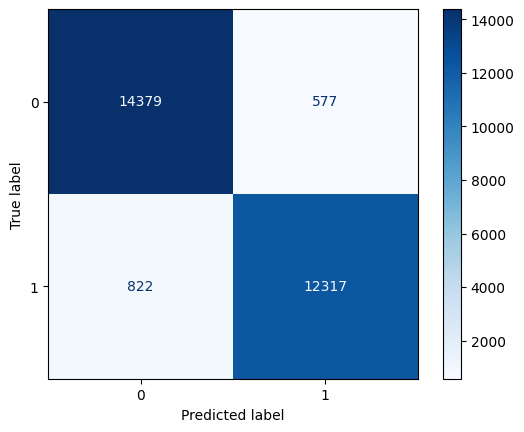

Best parameters found:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation score:  0.9520693327831987


In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
pdtc = DecisionTreeClassifier()

# Define the parameter grid for pruning
param_grid = {
    'max_depth': [3, 5, 7, 15, 30, None], #Xác định độ sâu tối đa của cây.
    'min_samples_split': [2, 5, 10], # Xác định số lượng mẫu tối thiểu cần thiết để một node có thể được chia tách
    'min_samples_leaf': [1, 2, 4] #Xác định số lượng mẫu tối thiểu cần thiết để một node lá có thể tồn tại.
}

# Apply GridSearchCV for cross-validation and parameter tuning
grid_search = GridSearchCV(estimator=pdtc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best estimator
best_dtc = grid_search.best_estimator_

# Predict using the best estimator
y_pred_test_pdtc = best_dtc.predict(x_test)
y_pred_train_pdtc = best_dtc.predict(x_train)
# Tính toán các chỉ số đánh giá
p, r, acc_train, acc_test = metrics(y_train, y_test, y_pred_train_pdtc, y_pred_test_pdtc)

# Cập nhật kết quả vào DataFrame
results_df.loc[results_df.index == 'Pruned Decision tree', 'acc_test'] = acc_test
results_df.loc[results_df.index == 'Pruned Decision tree', 'Precision'] = p
results_df.loc[results_df.index == 'Pruned Decision tree', 'recall'] = r
results_df.loc[results_df.index == 'Pruned Decision tree', 'acc_train'] = acc_train
# Hiển thị ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_test_pdtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

# Print the best parameters and cross-validation score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)




In [111]:
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree
# # Giả sử grid_search.best_estimator_ đã được xác định
# plt.figure(figsize=(15, 10))
# plot_tree(grid_search.best_estimator_, filled=True)
# plt.title("Original Decision Tree")
# # Xuất ra file PDF
# plt.savefig("decision_tree.pdf", format='pdf')
# plt.close()

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train_pdtc))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     34887
           1       0.98      0.96      0.97     30666

    accuracy                           0.97     65553
   macro avg       0.97      0.97      0.97     65553
weighted avg       0.97      0.97      0.97     65553



In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_pdtc))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     14956
           1       0.96      0.94      0.95     13139

    accuracy                           0.95     28095
   macro avg       0.95      0.95      0.95     28095
weighted avg       0.95      0.95      0.95     28095



C4.5 tree

In [ ]:
# from C45 import C45Classifier

# # Khởi tạo mô hình C4.5
# dtc = C45Classifier()

# # Huấn luyện mô hình
# dtc.fit(x_train, y_train)

# # Dự đoán trên tập kiểm tra
# y_pred_test_dtc = dtc.predict(x_test)
# y_pred_train_dtc = dtc.predict(x_train)

# # Tính toán các chỉ số đánh giá
# p, r, acc_train, acc_test = metrics(y_train, y_test, y_pred_train_dtc, y_pred_test_dtc)

# # Cập nhật kết quả vào DataFrame
# results_df.loc[results_df.index == 'Decision tree', 'acc_test'] = acc_test
# results_df.loc[results_df.index == 'Decision tree', 'Precision'] = p
# results_df.loc[results_df.index == 'Decision tree', 'recall'] = r
# results_df.loc[results_df.index == 'Decision tree', 'acc_train'] = acc_train

# # Hiển thị ma trận nhầm lẫn
# cm = confusion_matrix(y_test, y_pred_test_dtc)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap=plt.cm.Blues, values_format='d')
# plt.show()


In [115]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred_test_dtc))

In [116]:
# from sklearn.metrics import classification_report
# print(classification_report(y_train, y_pred_train_dtc))

In [117]:
# dtc.summary()

# Naive Bayes Model

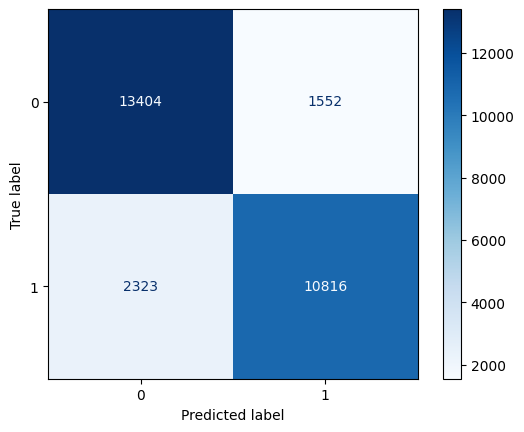

In [118]:
#Naive Bias Model
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

y_pred_test_gnb=gnb.predict(x_test)
y_pred_train_gnb=gnb.predict(x_train)

#Calculate metrics
p,r,acc_train,acc_test=metrics(y_train,y_test,y_pred_train_gnb,y_pred_test_gnb)

results_df.loc[results_df.index == 'Naive bayes', 'acc_test'] = acc_test
results_df.loc[results_df.index == 'Naive bayes', 'Precision'] = p
results_df.loc[results_df.index == 'Naive bayes', 'recall'] = r
results_df.loc[results_df.index == 'Naive bayes', 'acc_train'] = acc_train


# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_test_gnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train_gnb))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88     34887
           1       0.88      0.82      0.85     30666

    accuracy                           0.87     65553
   macro avg       0.87      0.86      0.86     65553
weighted avg       0.87      0.87      0.86     65553



In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_gnb))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87     14956
           1       0.87      0.82      0.85     13139

    accuracy                           0.86     28095
   macro avg       0.86      0.86      0.86     28095
weighted avg       0.86      0.86      0.86     28095



In [121]:
results_df

,Precision,recall,acc_train,acc_test
Naive bayes,0.862685,0.862075,0.865285,0.862075
Decision tree,0.000000,0.000000,0.000000,0.000000
Pruned Decision tree,0.950286,0.950205,0.971611,0.950205
